In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 
import warnings 
import os

warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True' # to prevent kernel from terminating
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

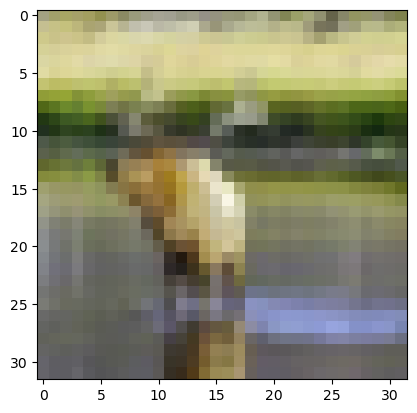

In [6]:
plt.imshow(X_train[89])

In [7]:
# Preprocessing

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
## transforming to categorical

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [14]:
## Creating the model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [37]:
model = Sequential()
#Convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(32,32,3),activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(32,32,3),activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten images
model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [39]:
## Using early stopping

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [42]:
model.fit(X_train,y_cat_train,epochs=20,
         validation_data=(X_test,y_cat_test),callbacks=early_stop)

Epoch 1/20
1563/1563 [==============================] - 38s 23ms/step - loss: 1.4965 - accuracy: 0.4587 - val_loss: 1.2658 - val_accuracy: 0.5544
Epoch 2/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1482 - accuracy: 0.5948 - val_loss: 1.1361 - val_accuracy: 0.5976
Epoch 3/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0053 - accuracy: 0.6463 - val_loss: 1.0056 - val_accuracy: 0.6479
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8880 - accuracy: 0.6897 - val_loss: 1.0150 - val_accuracy: 0.6501
Epoch 5/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8017 - accuracy: 0.7197 - val_loss: 0.9982 - val_accuracy: 0.6585
Epoch 6/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7243 - accuracy: 0.7471 - val_loss: 0.9637 - val_accuracy: 0.6741
Epoch 7/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6529 - accuracy: 0.7695 - val_loss: 0.9666 -

In [43]:
# Evaluations

In [44]:
metrics = pd.DataFrame(model.history.history)

In [45]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.496538,0.45868,1.265838,0.5544
1,1.148191,0.59478,1.136133,0.5976
2,1.005283,0.64626,1.005615,0.6479
3,0.888020,0.68966,1.015002,0.6501
4,0.801719,0.71972,0.998220,0.6585
5,0.724288,0.74708,0.963673,0.6741
6,0.652945,0.76950,0.966638,0.6814
7,0.582709,0.79532,1.004472,0.6771


In [46]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

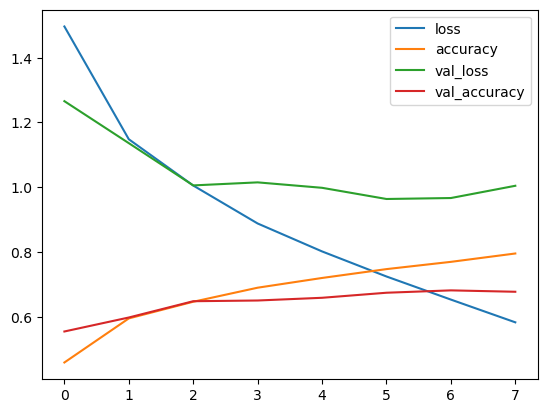

In [47]:
metrics.plot()

<Axes: >

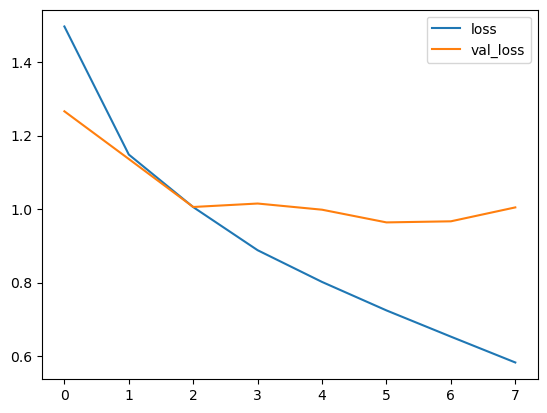

In [48]:
metrics[['loss','val_loss']].plot()